# 1. Basic QA agent by Langchain
The essential steps for setting a base agent include
- setup LLM
- setup tools
- setup agent

### setup LLM

In [53]:
from langchain_google_vertexai import VertexAI

llm = VertexAI()

### Setup tools
**Langchain** provides tools for LLM to interact with to complete tasks. The tools should be a list of **Langchain** `Tool` objects.

In [54]:
from langchain.agents import load_tools

In [55]:
tools = load_tools(['ddg-search', 'llm-math'], llm=llm)

### Setup Agent

In [56]:
from langchain.agents import initialize_agent
from langchain.agents import AgentType

In [57]:
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

we could display the architecture of the agent by below code piece.

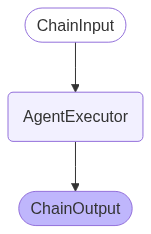

In [58]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [59]:
response = agent.invoke("Who is Leo DiCaprio’s girlfriend? What is her current age raised to the 0.43 power? ")



> Entering new AgentExecutor chain...
Thought: First I need to find out who Leonardo DiCaprio's girlfriend is. Then I need to determine her current age, and finally raise that age to the power of 0.43.
Action: duckduckgo_search
Action Input: "Leonardo DiCaprio girlfriend"
Observation: Leonardo DiCaprio, 50, reunites with bachelor party pals while supermodel love, 27, is in Italy Miley Cyrus' mom Tish reveals how she feels about her relationship with boyfriend Maxx Morando Leonardo DiCaprio's girlfriend Vittoria Ceretti, who was first linked to the Titanic actor in 2023, shared rare insight into their romance—including what she thinks about his most iconic film role. A source said DiCaprio calls Ceretti his "girlfriend." "Vittoria is a beautiful girl, but Leonardo is of course surrounded by many beautiful girls most of the time," an insider told The ... Leonardo DiCaprio and girlfriend Vittoria Ceretti have been romantically linked since August 2023. By. Emily Weaver. Emily Weaver. Em

Print response in pretty way

In [60]:
from rich import print as pprint

In [61]:
pprint(response)

{
    'input': 'Who is Leo DiCaprio’s girlfriend? What is her current age raised to the 0.43 power? ',
    'output': "Leonardo DiCaprio's girlfriend is Vittoria Ceretti. Her current age (26) raised to the 0.43 power is
approximately 4.059."
}

when calling `initialize_agent()` function, we initialized an `Agent` object with default Prompt. We could read the prompt by below way

In [62]:
pprint(agent.agent.llm_chain.prompt.template)

Answer the following questions as best you can. You have access to the following tools:

duckduckgo_search - A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current 
events. Input should be a search query.
Calculator(*args: Any, callbacks: Union[list, langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, 
tags: Optional[list] = None, metadata: Optional[dict] = None, **kwargs: Any) -> Any - Useful for when you need to 
answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of 
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}

***
# 2. Explore more on Agent Types
In section 1, we build an agent with `AgentType.ZERO_SHOT_REACT_DESCRIPTION`. In **Langchain**, there are more predefined agent types.

## 2.1 ReAct 

## 2.2 ReAct Document Store
......

### 2.2.1 Set up tools

In [63]:
from langchain.agents import Tool
from langchain.agents.react.base import DocstoreExplorer
from langchain_community.docstore.wikipedia import Wikipedia

In [64]:
wiki_docstore = DocstoreExplorer(Wikipedia())

In [65]:
tools = [
    Tool(
        name='Search', func=wiki_docstore.search,
        description='useful for when you need to ask with search',
    ),
    Tool(
        name='Lookup', func=wiki_docstore.lookup,
        description='useful for when you need to ask with lookup',
    )
]

### 2.2.3 Set up Agent

In [66]:
agent = initialize_agent(
    tools, llm, 
    agent=AgentType.REACT_DOCSTORE,
    max_iteration=5,
    verbose=True,
    return_intermediate_steps=True
)

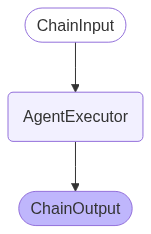

In [67]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [68]:
pprint(agent.agent.llm_chain.prompt.template)

Question: What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?
Thought: I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends 
into, then find the elevation range of the area.
Action: Search[Colorado orogeny]
Observation: The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding 
areas.
Thought: It does not mention the eastern sector. So I need to look up eastern sector.
Action: Lookup
Observation: (Result 1 / 1) The eastern sector extends into the High Plains and is called the Central Plains 
orogeny.
Thought: The eastern sector of Colorado orogeny extends into the High Plains. So I need to search High Plains and 
find its elevation range.
Action: Search[High Plains]
Observation: High Plains refers to one of two distinct land regions
Thought: I need to instead search High Plains (United States).
Action: Search[High Plains (United States)]
Observation: The High Plains are a subregion of the Great Plains. From east to west, the High Plains rise in 
elevation from around 1,800 to 7,000 ft (550 to 2,130 m).[3]
Thought: High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer is 1,800 to 7,000 ft.
Action: Finish[1,800 to 7,000 ft]

Question: Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt 
Groening named after who?
Thought: The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search 
Milhouse and find who it is named after.
Action: Search[Milhouse]
Observation: Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The 
Simpsons voiced by Pamela Hayden and created by Matt Groening.
Thought: The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".
Action: Lookup
Observation: (Result 1 / 1) Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.
Thought: Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.
Action: Finish[Richard Nixon]

Question: Which documentary is about Finnish rock groups, Adam Clayton Powell or The Saimaa Gesture?
Thought: I need to search Adam Clayton Powell and The Saimaa Gesture, and find which documentary is about Finnish 
rock groups.
Action: Search[Adam Clayton Powell]
Observation: Could not find [Adam Clayton Powell]. Similar: [’Adam Clayton Powell III’, ’Seventh Avenue 
(Manhattan)’, ’Adam Clayton Powell Jr. State Office Building’, ’Isabel Washington Powell’, ’Adam Powell’, ’Adam 
Clayton Powell (film)’, ’Giancarlo Esposito’].
Thought: To find the documentary, I can search Adam Clayton Powell (film).
Action: Search[Adam Clayton Powell (film)]
Observation: Adam Clayton Powell is a 1989 American documentary film directed by Richard Kilberg. The film is about
the rise and fall of influential African-American politician Adam Clayton Powell Jr.[3][4] It was later aired as 
part of the PBS series The American Experience.
Thought: Adam Clayton Powell (film) is a documentary about an African-American politician, not Finnish rock groups.
So the documentary about Finnish rock groups must instead be The Saimaa Gesture.
Action: Finish[The Saimaa Gesture]

Question: What profession does Nicholas Ray and Elia Kazan have in common?
Thought: I need to search Nicholas Ray and Elia Kazan, find their professions, then find the profession they have 
in common.
Action: Search[Nicholas Ray]
Observation: Nicholas Ray (born Raymond Nicholas Kienzle Jr., August 7, 1911 - June 16, 1979) was an American film 
director, screenwriter, and actor best known for the 1955 film Rebel Without a Cause.
Thought: Professions of Nicholas Ray are director, screenwriter, and actor. I need to search Elia Kazan next and 
find his professions.
Action: Search[Elia Kazan]
Observation: Elia Kazan was an American film and theatre director, producer, screenwriter an

In [69]:
response = agent.invoke('秦朝建立是在什麼時間?')



> Entering new AgentExecutor chain...
Thought: The question translates to: "When was the Qin Dynasty established?" I need to search for the Qin Dynasty and find out when it was established.
Action: Search[秦朝建立時間]
Observation: Could not find [秦朝建立時間]. Similar: []
Thought:I need to try searching in English first.
Action: Search[Qin Dynasty establishment date]
Observation: For most of its history, China was organized into various dynastic states under the rule of hereditary monarchs. Beginning with the establishment of dynastic rule by Yu the Great c. 2070 BC, and ending with the abdication of the Xuantong Emperor in AD 1912, Chinese historiography came to organize itself around the succession of monarchical dynasties. Besides those established by the dominant Han ethnic group or its spiritual Huaxia predecessors, dynasties throughout Chinese history were also founded by non-Han peoples.
Dividing Chinese history into dynastic epochs is a convenient and conventional method of periodizati

C:\Users\andrewchan\miniconda3\envs\vertexai\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\andrewchan\miniconda3\envs\vertexai\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Could not find [秦朝]. Similar: ['Qin dynasty', 'History of China', 'Dynasties of China', 'Family tree of Chinese monarchs (221 BCE – 453 CE)', 'List of kingdoms and royal dynasties', 'Qin campaign against the Baiyue', 'Three Lords and Nine Ministers', 'Jinhan confederacy', 'List of Chinese monarchs', 'Fan Bingbing filmography']
Thought:Action: Search[Qin dynasty]
Observation: The Qing dynasty ( CHING), officially the Great Qing, was a Manchu-led imperial dynasty of China and an early modern empire in East Asia. The last imperial dynasty in Chinese history, the Qing dynasty was preceded by the Ming dynasty and succeeded by the Republic of China. At its height of power, the empire stretched from the Sea of Japan in the east to the Pamir Mountains in the west, and from the Mongolian Plateau in the north to the South China Sea in the south. Originally emerging from the Later Jin dynasty founded in 1616 and proclaimed in Shenyang in 1636, the dynasty seized control of the Ming 

In [70]:
pprint(response)

{
    'input': '秦朝建立是在什麼時間?',
    'output': '221 BC',
    'intermediate_steps': [
        (
            AgentAction(
                tool='Search',
                tool_input='秦朝建立時間',
                log='Thought: The question translates to: "When was the Qin Dynasty established?" I need to search 
for the Qin Dynasty and find out when it was established.\nAction: Search[秦朝建立時間]'
            ),
            'Could not find [秦朝建立時間]. Similar: []'
        ),
        (
            AgentAction(
                tool='Search',
                tool_input='Qin Dynasty establishment date',
                log='I need to try searching in English first.\nAction: Search[Qin Dynasty establishment date]'
            ),
            'For most of its history, China was organized into various dynastic states under the rule of hereditary
monarchs. Beginning with the establishment of dynastic rule by Yu the Great c.\u20092070 BC, and ending with the 
abdication of the Xuantong Emperor in AD 1912, Chinese historiography came to organize itself around the succession
of monarchical dynasties. Besides those established by the dominant Han ethnic group or its spiritual Huaxia 
predecessors, dynasties throughout Chinese history were also founded by non-Han peoples.\nDividing Chinese history 
into dynastic epochs is a convenient and conventional method of periodization. Accordingly, a dynasty may be used 
to delimit the era during which a family reigned, as well as to describe events, trends, personalities, artistic 
compositions, and artifacts of that period. For example, porcelain made during the Ming dynasty may be referred to 
as "Ming porcelain".\nThe longest-reigning orthodox dynasty of China was the Zhou dynasty, ruling for a total 
length of about 790 years, albeit it is divided into the Western Zhou and the Eastern Zhou in Chinese 
historiography. The largest orthodox Chinese dynasty in terms of territorial size was either the Yuan dynasty or 
the Qing dynasty, depending on the historical source.\nThe term "Tiāncháo" (天朝; "Celestial Dynasty" or "Heavenly 
Dynasty") was frequently employed as a self-reference by Chinese dynasties. As a form of respect and subordination,
Chinese tributary states referred to these dynasties as "Tiāncháo Shàngguó" (天朝上國; "Celestial Dynasty of the 
Exalted State") or "Tiāncháo Dàguó" (天朝大國; "Celestial Dynasty of the Great State").'
        ),
        (
            AgentAction(
                tool='Search',
                tool_input='Qin Dynasty start date',
                log="This passage doesn't answer the question directly. Let me try searching specifically for the 
establishment date of the Qin Dynasty.\nAction: Search[Qin Dynasty start date]"
            ),
            "Could not find [Qin Dynasty start date]. Similar: ['Qin Shi Huang', 'Dynasties of China', 'History of 
the Great Wall of China', 'BYD Qin', 'List of emperors of the Han dynasty', 'Bai Qi', 'Zhao Gao', 'List of wars 
involving Vietnam', '3rd century BC', 'Mount Mangdang']"
        ),
        (
            AgentAction(
                tool='Search',
                tool_input='秦朝',
                log='Let me try searching for the Qin Dynasty in simplified Chinese.\nAction: Search[秦朝]'
            ),
            "Could not find [秦朝]. Similar: ['Qin dynasty', 'History of China', 'Dynasties of China', 'Family tree
of Chinese monarchs (221 BCE – 453 CE)', 'List of kingdoms and royal dynasties', 'Qin campaign against the Baiyue',
'Three Lords and Nine Ministers', 'Jinhan confederacy', 'List of Chinese monarchs', 'Fan Bingbing filmography']"
        ),
        (
            AgentAction(tool='Search', tool_input='Qin dynasty', log='Action: Search[Qin dynasty]'),
            "The Qing dynasty ( CHING), officially the Great Qing, was a Manchu-led imperial dynasty of China and 
an early modern empire in East Asia. The last imperial dynasty in Chinese history, the Qing dynasty was preceded by
the Ming dynasty and succeeded by the Republic of China. At it

## 2.3 Self-Ask with Search

### 2.3.1 Set up tool

In [73]:
from langchain_community.utilities import GoogleSerperAPIWrapper

search = GoogleSerperAPIWrapper()

In [74]:
tools = [
    Tool(
        name="Intermediate Answer", func=search.run,
        description='useful for when you need to ask with search'
    )
]

### Set up Agent

In [76]:
agent = initialize_agent(
    tools, llm, 
    agent=AgentType.SELF_ASK_WITH_SEARCH,
    max_iteration=5,
    verbose=True,
    return_intermediate_steps=True,
    handle_parsing_errors=True
)

In [77]:
response = agent.invoke('Which country was Microsoft CEO of 2023 born in?')



> Entering new AgentExecutor chain...
Yes.
Follow up: Who was the Microsoft CEO of 2023?
Intermediate answer: Satya Nadella. Satya Narayana Nadella (/nəˈdɛlə/; born 19 August 1967) is an Indian-born American business executive who is the chairman and chief executive officer (CEO) of Microsoft, succeeding Steve Ballmer in 2014 as CEO and John W. Thompson in 2021 as chairman.
Could not parse output: So the final answer is: India

For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
Intermediate answer: Invalid or incomplete response
Are follow up questions needed here: Yes.
Follow up: Who was the Microsoft CEO of 2023?
Intermediate answer: Satya Nadella. Satya Narayana Nadella (/nəˈdɛlə/; born 19 August 1967) is an Indian-born American business executive who is the chairman and chief executive officer (CEO) of Microsoft, succeeding Steve Ballmer in 2014 as CEO and John W. Thompson in 2021 as chairman.
So the final answer is: India

In [78]:
pprint(response)

{
    'input': 'Which country was Microsoft CEO of 2023 born in?',
    'output': 'India',
    'intermediate_steps': [
        (
            AgentAction(
                tool='Intermediate Answer',
                tool_input='Who was the Microsoft CEO of 2023?',
                log='Yes.\nFollow up: Who was the Microsoft CEO of 2023?'
            ),
            'Satya Nadella. Satya Narayana Nadella (/nəˈdɛlə/; born 19 August 1967) is an Indian-born American 
business executive who is the chairman and chief executive officer (CEO) of Microsoft, succeeding Steve Ballmer in 
2014 as CEO and John W. Thompson in 2021 as chairman.'
        ),
        (
            AgentAction(
                tool='_Exception',
                tool_input='Invalid or incomplete response',
                log='Could not parse output: So the final answer is: India\n\nFor troubleshooting, visit: 
https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE '
            ),
            'Invalid or incomplete response'
        ),
        (
            AgentAction(
                tool='Intermediate Answer',
                tool_input='Who was the Microsoft CEO of 2023?',
                log='Are follow up questions needed here: Yes.\nFollow up: Who was the Microsoft CEO of 2023?'
            ),
            'Satya Nadella. Satya Narayana Nadella (/nəˈdɛlə/; born 19 August 1967) is an Indian-born American 
business executive who is the chairman and chief executive officer (CEO) of Microsoft, succeeding Steve Ballmer in 
2014 as CEO and John W. Thompson in 2021 as chairman.'
        )
    ]
}

***
# 3. Tools for Agent
A **Tool** in **LangChain** is a function or API that an agent can use to perform specific actions or retrieve information beyond the language model’s capabilities. Tools can be anything: a calculator, a web search, a database query, or even your own Python function.